## Abstimmung 1959 – Übersicht

- **Stimmberechtigte:** 1’480’555
- **Abgegebene Stimmen:** 987’843
- **Wahlbeteiligung:** 66.7 %

### Gültige Stimmen

- **Total gültige Stimmen:** 978’666
  - **Ja-Stimmen:** 323’727
  - **Nein-Stimmen:** 654’939
  - **Zustimmungsrate:** 33.1 %

---

### Nächster Schritt

Lasst uns nun die jeweiligen Stimmen **pro Kanton** auswerten.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# -----------------------------------------
# 1. Daten einlesen und bereinigen
# -----------------------------------------

In [11]:

# CSV laden
df = pd.read_csv("Data/1959_Kantonale_clean.csv")

# Unnötige Spalte entfernen
df = df.drop(columns=["Unnamed: 0"])

# Spaltennamen bereinigen (z. B. Leerzeichen am Ende)
df.columns = df.columns.str.strip()

# Zahlenfelder bereinigen (Tausendertrennzeichen entfernen, "-" zu "0", dann in numerisch umwandeln)
for col in ['Stimmberechtigte', 'Abgebene_Stimmen', 'Leer', 'Ungültig',
            'Gültige_Stimmen', 'Ja', 'Nein']:
    df[col] = df[col].astype(str).str.replace("’", "").str.replace(" ", "").str.replace("-", "0")
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Prozentwerte bereinigen und umwandeln
df['Wahlbeteiligung'] = pd.to_numeric(df['Wahlbeteiligung'], errors='coerce')
df['Zustimmungsrate'] = pd.to_numeric(df['Zustimmungsrate'], errors='coerce')


# -----------------------------------------
# 2. Überblick über die Daten
# -----------------------------------------

In [12]:

print("📊 Statistische Übersicht:")
print(df.describe())

📊 Statistische Übersicht:
       Stimmberechtigte  Abgebene_Stimmen  Wahlbeteiligung         Leer  \
count         25.000000         25.000000        25.000000    25.000000   
mean       59222.200000      39513.720000        66.600000   299.880000   
std        66793.054792      47115.324572         9.871508   411.721216   
min         3600.000000       2171.000000        45.000000     5.000000   
25%        13583.000000       9963.000000        60.300000    60.000000   
50%        43478.000000      26897.000000        65.600000   151.000000   
75%        67067.000000      38732.000000        71.800000   374.000000   
max       260027.000000     200537.000000        86.600000  1810.000000   

         Ungültig  Gültige_Stimmen            Ja           Nein  \
count   25.000000        25.000000     25.000000      25.000000   
mean    67.200000     39146.640000  12949.080000   26197.560000   
std     93.433131     46703.694143  17224.256653   30425.725828   
min      0.000000      2155.00


# -----------------------------------------
# 3. Korrelationsmatrix
# -----------------------------------------

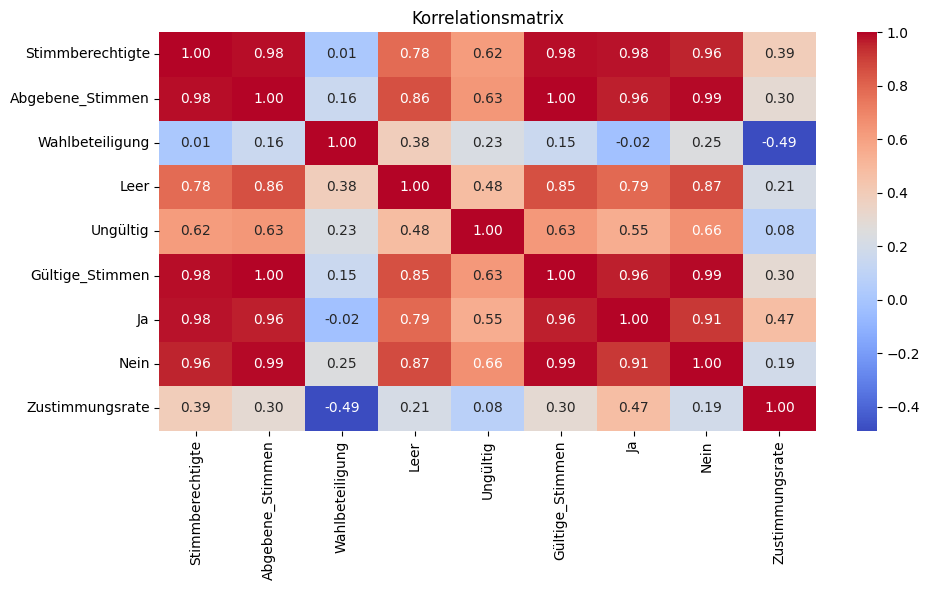

In [13]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelationsmatrix")
plt.tight_layout()
plt.show()



# -----------------------------------------
# 5. Balkendiagramm: Wahlbeteiligung pro Kanton
# -----------------------------------------

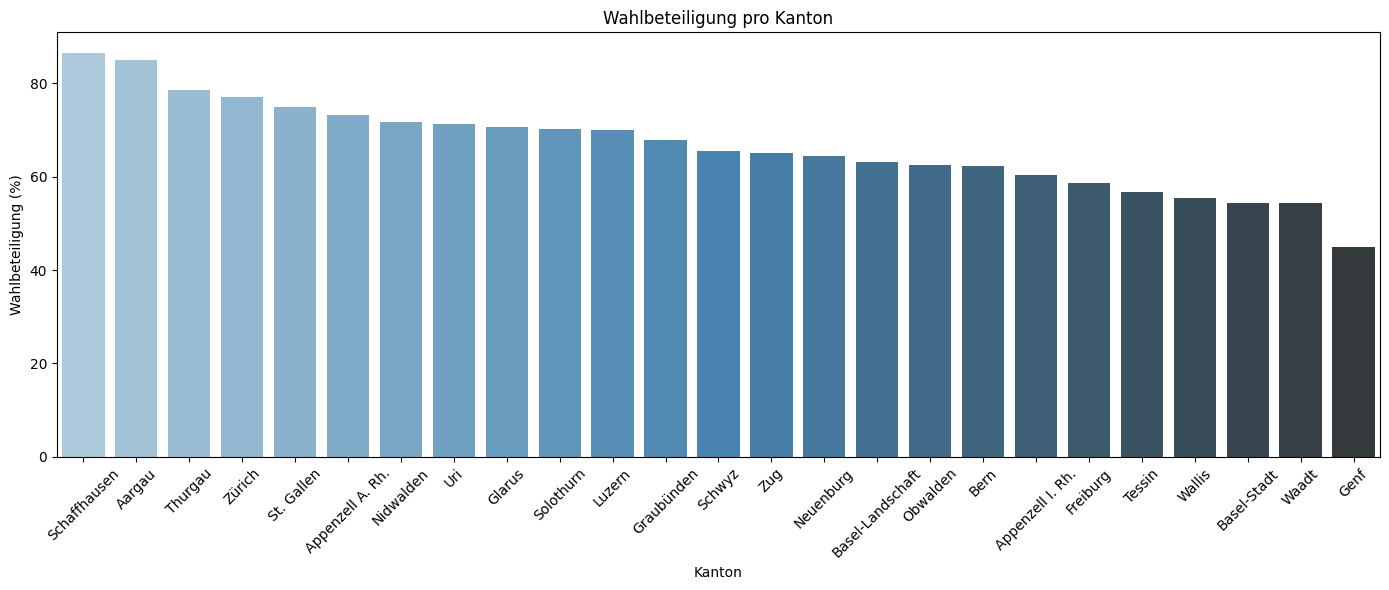

In [26]:

plt.figure(figsize=(14, 6))
df_sorted_beteiligung = df.sort_values('Wahlbeteiligung', ascending=False)
sns.barplot(x="Kanton", y="Wahlbeteiligung", data=df_sorted_beteiligung, palette="Blues_d", hue="Kanton", legend=False)
plt.title("Wahlbeteiligung pro Kanton")
plt.xlabel("Kanton")
plt.ylabel("Wahlbeteiligung (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# -----------------------------------------
# 6. Balkendiagramm: Zustimmungsrate pro Kanton (farblich)
# -----------------------------------------

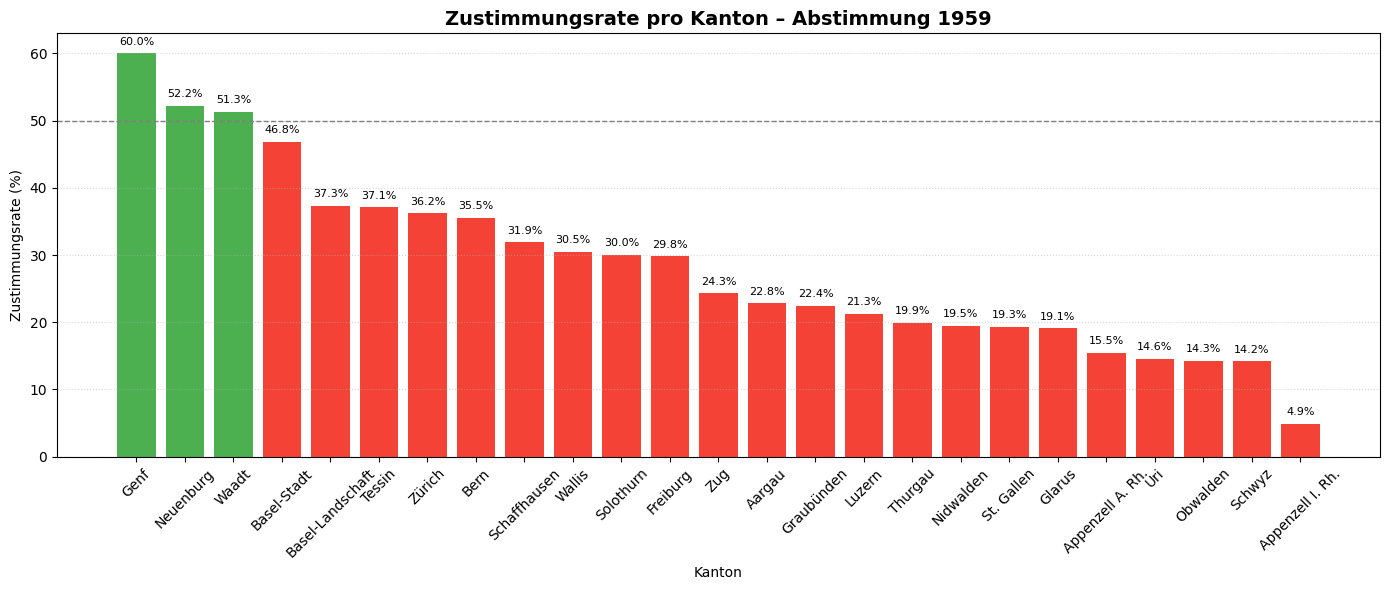

In [27]:

df_sorted = df.sort_values('Zustimmungsrate', ascending=False)
farben = ['#4CAF50' if rate > 50 else '#F44336' for rate in df_sorted['Zustimmungsrate']]

plt.figure(figsize=(14, 6))
bars = plt.bar(df_sorted['Kanton'], df_sorted['Zustimmungsrate'], color=farben)
plt.axhline(50, color='gray', linestyle='--', linewidth=1)
plt.title("Zustimmungsrate pro Kanton – Abstimmung 1959", fontsize=14, weight='bold')
plt.xlabel("Kanton")
plt.ylabel("Zustimmungsrate (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':', alpha=0.5)

# Prozentwerte über Balken anzeigen
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f"{yval:.1f}%", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()
